<a href="https://colab.research.google.com/github/nesamathi/ml./blob/main/crop_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!

📄 Sample data:
            Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909   

✅ Models trained successfully!

🧾 Enter details for prediction (or type 'exit' to stop):
State name: Tamil Nadu
Annual Rainfall (in mm): 1000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



🌾 Predicted Results:
State: Tamil Nadu
Crop: Rice
Crop Year: 2020
Expected Yield: 70.18 units



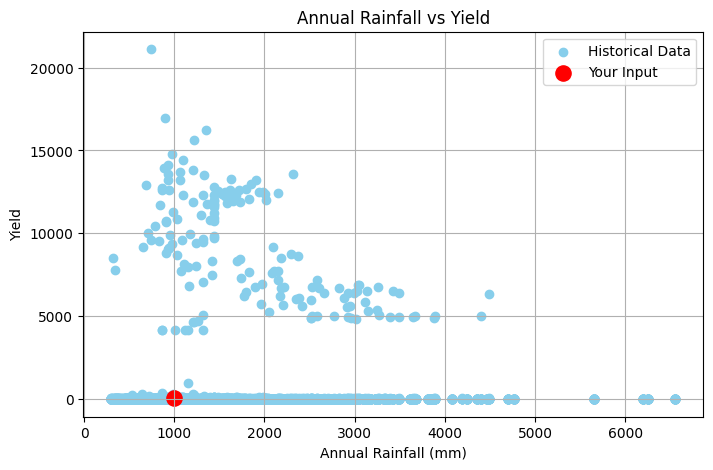

------------------------------------------------------

🧾 Enter details for prediction (or type 'exit' to stop):


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Step 1: Load dataset
try:
    df = pd.read_csv("/content/crop_yield.csv")
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ File not found! Please make sure '/content/crop_yield.csv' is in the same folder.")
    exit()

print("📄 Sample data:\n", df.head(), "\n")

# Step 2: Encode 'State' for ML
le_state = LabelEncoder()
df["State_encoded"] = le_state.fit_transform(df["State"])

# Step 3: Train models
# Model 1: Predict Crop
X_crop = df[["State_encoded", "Annual_Rainfall"]]
y_crop = df["Crop"]
crop_model = RandomForestClassifier(random_state=42)
crop_model.fit(X_crop, y_crop)

# Model 2: Predict Yield
X_yield = df[["Annual_Rainfall"]]
y_yield = df["Yield"]
yield_model = LinearRegression()
yield_model.fit(X_yield, y_yield)

# Find latest crop year
latest_year = df["Crop_Year"].max()

print("✅ Models trained successfully!\n")

# Step 4: Continuous prediction loop
while True:
    print("🧾 Enter details for prediction (or type 'exit' to stop):")

    # Input State
    state_in = input("State name: ")
    if state_in.lower() == "exit":
        print("\n👋 Exiting program. Have a great day!")
        break

    # Check if state is valid
    if state_in not in le_state.classes_:
        print("⚠️ State not found in dataset. Please check spelling.\n")
        continue

    # Input rainfall
    try:
        rain_in = float(input("Annual Rainfall (in mm): "))
    except ValueError:
        print("⚠️ Please enter a valid number for rainfall.\n")
        continue

    # Encode and predict
    state_encoded = le_state.transform([state_in])[0]
    pred_crop = crop_model.predict([[state_encoded, rain_in]])[0]
    pred_yield = yield_model.predict([[rain_in]])[0]

    # Show prediction
    print("\n🌾 Predicted Results:")
    print(f"State: {state_in}")
    print(f"Crop: {pred_crop}")
    print(f"Crop Year: {latest_year}")
    print(f"Expected Yield: {pred_yield:.2f} units\n")

    # Plot graph
    plt.figure(figsize=(8, 5))
    plt.scatter(df["Annual_Rainfall"], df["Yield"], color="skyblue", label="Historical Data")
    plt.scatter(rain_in, pred_yield, color="red", s=120, label="Your Input")
    plt.title("Annual Rainfall vs Yield")
    plt.xlabel("Annual Rainfall (mm)")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()